# Logistic Regression

Here I do logistic regression on a fake advertising dataset to predict if the user will click on add or not

### Importing Required Modules

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
%matplotlib inline

Getting the data


In [40]:
ad=pd.read_csv("advertising.csv")

In [41]:
ad.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [42]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [43]:
ad.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# Some Data Analysis

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

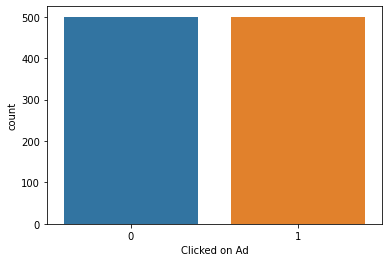

In [44]:
sns.countplot(x="Clicked on Ad",data=ad)

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

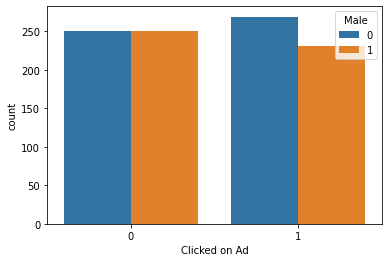

In [45]:
sns.countplot(x="Clicked on Ad",data=ad,hue="Male")


<AxesSubplot:xlabel='Daily Time Spent on Site', ylabel='Count'>

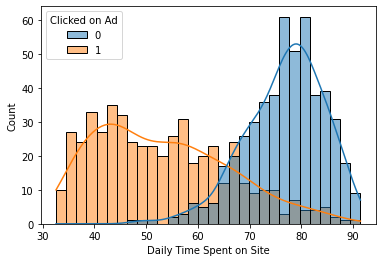

In [46]:
sns.histplot(data=ad,x="Daily Time Spent on Site",hue="Clicked on Ad",kde=True,bins=30)

<AxesSubplot:xlabel='Daily Internet Usage', ylabel='Count'>

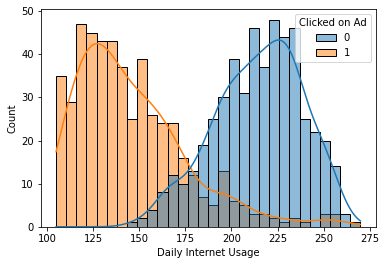

In [47]:
sns.histplot(data=ad,x="Daily Internet Usage",hue="Clicked on Ad",kde=True,bins=30)

<AxesSubplot:xlabel='Area Income', ylabel='Count'>

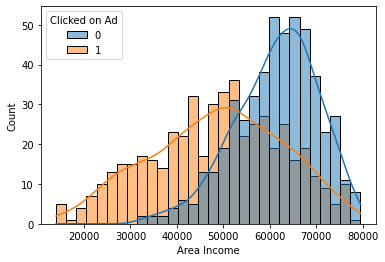

In [48]:
sns.histplot(data=ad,x="Area Income",hue="Clicked on Ad",kde=True,bins=30)

<AxesSubplot:xlabel='Age', ylabel='Count'>

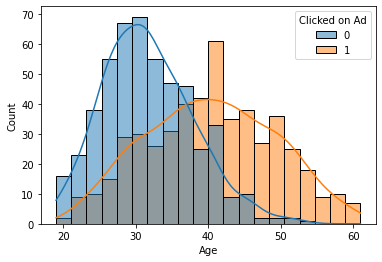

In [49]:
sns.histplot(data=ad,x="Age",hue="Clicked on Ad",kde=True,bins=20)

In [50]:
ad["Timestamp"]=pd.to_datetime(ad["Timestamp"])
ad["Hour"]=ad["Timestamp"].dt.hour
ad["Month"]=ad["Timestamp"].dt.month
ad["Day"]=ad["Timestamp"].dt.day_name()

<AxesSubplot:xlabel='Hour', ylabel='Count'>

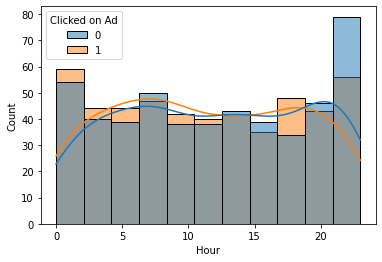

In [51]:
sns.histplot(data=ad,x="Hour",hue="Clicked on Ad",kde=True)

<AxesSubplot:xlabel='Month', ylabel='Count'>

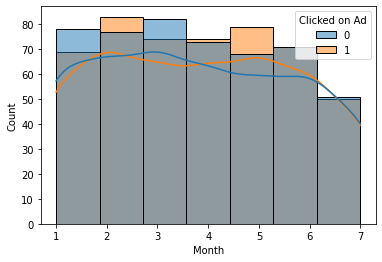

In [52]:
sns.histplot(data=ad,x="Month",hue="Clicked on Ad",kde=True,bins=7)

<AxesSubplot:xlabel='Day', ylabel='count'>

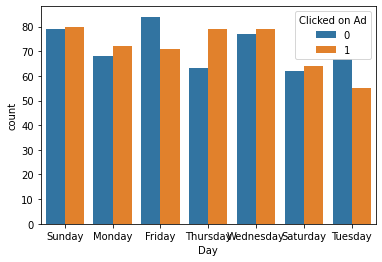

In [53]:
sns.countplot(data=ad,x="Day",hue="Clicked on Ad")

We can see that time does not have any correlation with **Clicked on Ad**

### Results
We can see that for the data the columns which have high correlation with **Clicked on Ad** are
- **Daily Time Spent on Site**
- **Age**
- **Daily Internet Usage**
- **Area Income**
- **Male**

Dropping the unnecessary columns

In [54]:
ad.drop(["Ad Topic Line","City","Country","Timestamp","Hour","Month","Day"],axis=1,inplace=True)

### Training and testing the model

In [55]:
X_train, X_test, y_train, y_test = train_test_split(ad.drop(['Clicked on Ad'],axis=1),ad['Clicked on Ad'], test_size=0.30)

In [56]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [57]:
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       144
           1       0.93      0.87      0.90       156

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



## Conclusion
We get **90%** Precision which is very good 